# Linear Regression 

### Problem Statement 

Amazon_cloth sells clothes online. Customers come to the store, have meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want. 

The company is trying to decide whether to  focus their efforts on their mobile app experience or their website.

The dataset is available at : https://www.kaggle.com/datasets/srolka/ecommerce-customers

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
import seaborn as sns

In [2]:
#Read the dataset
d = pd.read_csv("Ecommerce Customers.csv")

### Exploratory Data Analysis

In [3]:
#view the data
d.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
#View the descriptive statistics
d.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
#view the datatypes
d.dtypes

Email                    object
Address                  object
Avatar                   object
Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object

In [6]:
#Check for missing values
d.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [7]:
#correlation
d.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


<AxesSubplot:>

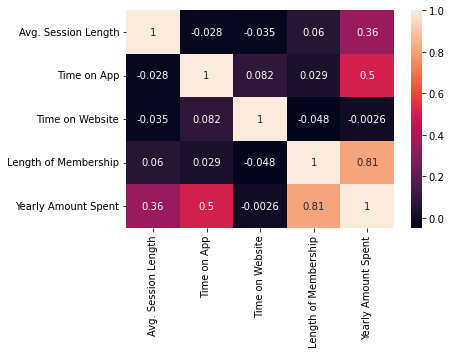

In [8]:
#Visualize the correlation 
sns.heatmap(d.corr(),annot=True)

#### Based off this visualization what looks to be the most correlated feature with Yearly Amount Spent is Length of Membership

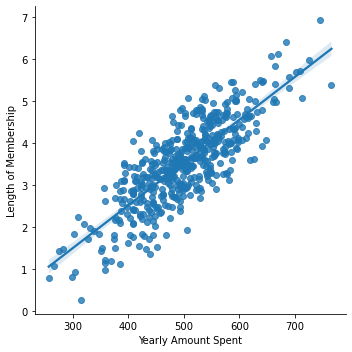

In [9]:
#Linear Plot
sns.lmplot(x='Yearly Amount Spent',y ='Length of Membership', data=d)

In [10]:
d.drop(columns = ['Email','Address','Avatar'],axis=0,inplace=True)

### Training and Testing Data
The Feature variable - Avg. Session Length, Time on App, Time on Website, Length of Membership

The Target variable - Yearly Amount Spent	

In [11]:
X = d.drop(columns = ['Yearly Amount Spent'],axis=0)
Y = d[['Yearly Amount Spent']]
X.shape,Y.shape

((500, 4), (500, 1))

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state = 42,test_size=0.3)

#### Training the model

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

#### Coefficiecnts and intercepts 

In [14]:
print("The coefficient of the model : " , model.coef_)
print("The Intercept of the model : " , model.intercept_)

The coefficient of the model :  [[25.72425621 38.59713548  0.45914788 61.67473243]]
The Intercept of the model :  [-1050.65367466]


#### Predict the data

In [15]:
y_pred = model.predict(X_test)

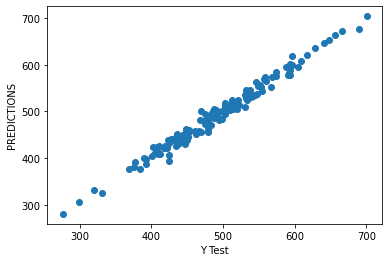

In [16]:
#Visualize the scatterplot
plt.scatter(y_test,y_pred)
plt.xlabel("Y Test")
plt.ylabel("PREDICTIONS")
plt.show()

#### Model Evaluation

In [17]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#mean_absolute_error 
print("Mean absolute error : " , np.round(mean_absolute_error(y_test,y_pred),2))
#mean_squared_error
print("Mean Squared error : " , np.round(np.sqrt(mean_squared_error(y_test,y_pred)),2))
#R2_score 
print("R2 Score : " , np.round(r2_score(y_test,y_pred),2))

Mean absolute error :  8.43
Mean Squared error :  10.19
R2 Score :  0.98


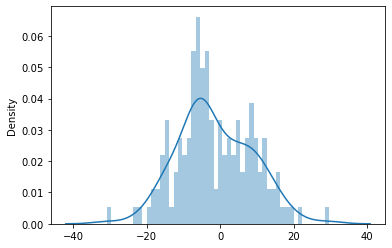

In [18]:
#Visualize the residuals 
sns.distplot((y_test-y_pred),bins=50);

#### Actual problem is that should the company focus on mobile or website development?

In [19]:
data = pd.DataFrame(model.coef_)
data.columns=[X.columns]
data

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,25.724256,38.597135,0.459148,61.674732


#### From the given table, we can understand that the company should focus on APP